# Australian Open 2020: Winner Predictor
## Models comparison
##### Web Intelligence Course, Ca' Foscari University, A.Y. 2019/2020
##### Diego Chinellato, 867637 - Giorgia Campardo, 867928

In [1]:
%matplotlib inline

# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# our modules
from preprocessing import *
from models import *
from reports import *

In [2]:
full_dataset = pd.read_csv('data/dataset.csv', 
                            encoding='utf-8-sig', 
                            dtype=DATA_TYPES,
                            parse_dates=['Date', 'WBD', 'LBD'])
print('Baseline ("stupid") models, or the lower bound on accuracy that we wish to improve upon.')
baseline_model(full_dataset)

Baseline ("stupid") models, or the lower bound on accuracy that we wish to improve upon.
Player with higher rank wins. Accuracy: 0.34
Player with higher avg bet wins. Accuracy: 0.3


In [3]:
full_dataset.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,MaxW,MaxL,AvgW,AvgL,WBD,WHand,WBHand,LBD,LHand,LBHand
0,1,Brisbane,Brisbane International,2011-01-02,ATP250,Outdoor,Hard,1st Round,3,Lopez F.,...,1.67,2.60,1.58,2.36,NaT,NaN,NaN,NaT,NaN,NaN
1,1,Brisbane,Brisbane International,2011-01-02,ATP250,Outdoor,Hard,1st Round,3,Istomin D.,...,2.10,1.85,1.99,1.76,1986-09-07,R,2.0,1974-05-05,L,2.0
2,3,Doha,Qatar Exxon Mobil Open,2011-01-03,ATP250,Outdoor,Hard,1st Round,3,Bubka S.,...,4.75,1.33,3.63,1.27,1987-02-10,R,2.0,1985-08-07,R,2.0
3,3,Doha,Qatar Exxon Mobil Open,2011-01-03,ATP250,Outdoor,Hard,1st Round,3,Marchenko I.,...,1.81,2.20,1.72,2.04,1987-09-08,R,2.0,1987-08-22,L,2.0
4,3,Doha,Qatar Exxon Mobil Open,2011-01-03,ATP250,Outdoor,Hard,1st Round,3,Tsonga J.W.,...,1.08,14.50,1.06,8.73,1985-04-17,R,2.0,NaT,NaN,NaN


In [4]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23730 entries, 0 to 23729
Data columns (total 48 columns):
ATP           23730 non-null int32
Location      23730 non-null object
Tournament    23730 non-null object
Date          23730 non-null datetime64[ns]
Series        23730 non-null object
Court         23730 non-null object
Surface       23730 non-null object
Round         23730 non-null object
Best of       23730 non-null int32
Winner        23730 non-null object
Loser         23730 non-null object
WRank         23720 non-null float64
LRank         23681 non-null float64
WPts          23722 non-null float64
LPts          23682 non-null float64
W1            23579 non-null float64
L1            23581 non-null float64
W2            23356 non-null float64
L2            23356 non-null float64
W3            11210 non-null float64
L3            11210 non-null float64
W4            2200 non-null float64
L4            2200 non-null float64
W5            816 non-null float64
L5          

In [5]:
full_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ATP,23730.0,32.951791,18.113622,1.000,19.00,33.00,49.00,67.00
Best of,23730.0,3.384576,0.788213,3.000,3.00,3.00,3.00,5.00
WRank,23720.0,56.727150,70.846344,1.000,16.00,40.00,74.00,1890.00
LRank,23681.0,87.091339,109.099050,1.000,34.00,62.00,100.00,2159.00
WPts,23722.0,1987.782733,2475.760878,1.000,694.00,1060.00,2030.00,16950.00
LPts,23682.0,1129.778397,1297.634746,1.000,558.00,789.50,1197.00,16950.00
W1,23579.0,5.807371,1.224677,0.000,6.00,6.00,6.00,7.00
L1,23581.0,4.106442,1.834233,0.000,3.00,4.00,6.00,7.00
W2,23356.0,5.783781,1.245778,0.000,6.00,6.00,6.00,7.00
L2,23356.0,3.952989,1.857367,0.000,3.00,4.00,6.00,7.00


#### Generation of training, validation and test sets

In [6]:
features_to_drop = ['Best of', 'Surface', 'Court']
features_to_add = ['top10', 'age']
labels = 'duplicate'
X_train, Y_train = preprocess_data(max_date = 2017,
                                   features_to_drop = features_to_drop,
                                   features_to_add = features_to_add,
                                   labels = labels)
X_valid, Y_valid = preprocess_data(min_date = 2018, 
                                   max_date = 2018, 
                                   features_to_drop = features_to_drop, 
                                   features_to_add = features_to_add,
                                   labels = labels)
X_test, Y_test = preprocess_data(min_date = 2019, 
                                 max_date = 2020, 
                                 features_to_drop = features_to_drop, 
                                 features_to_add = features_to_add,
                                 labels = labels)

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20190 entries, 0 to 20190
Data columns (total 15 columns):
Series      20190 non-null int64
Round       20190 non-null int64
P1Rank      20190 non-null int32
P2Rank      20190 non-null int32
P1Pts       20190 non-null int32
P2Pts       20190 non-null int32
P1Hand      20190 non-null int64
P1BHand     20190 non-null int32
P2Hand      20190 non-null int64
P2LBHand    20190 non-null int32
P1Age       20190 non-null float64
P2Age       20190 non-null float64
AgeDiff     20190 non-null float64
Top10P1     20190 non-null int32
Top10P2     20190 non-null int32
dtypes: float64(3), int32(8), int64(4)
memory usage: 1.8 MB


In [8]:
X_train.head()

,Series,Round,P1Rank,P2Rank,P1Pts,P2Pts,P1Hand,P1BHand,P2Hand,P2LBHand,P1Age,P2Age,AgeDiff,Top10P1,Top10P2
0,0,0,40,43,1031,975,0,2,1,2,24.3,36.7,-12.4,0,0
1,0,0,321,56,137,844,0,2,0,2,23.9,25.4,-1.5,0,0
2,0,0,81,82,613,611,0,2,1,2,23.3,23.4,-0.1,0,0
3,0,0,33,59,1275,819,0,1,0,2,27.6,23.0,4.6,0,0
4,0,0,49,74,935,655,0,2,0,2,26.5,24.7,1.8,0,0


In [9]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Series,20190.0,1.424071,1.510823,0.0,0.0,1.0,2.0,4.0
Round,20190.0,1.547895,2.087078,0.0,0.0,1.0,2.0,7.0
P1Rank,20190.0,69.729668,110.946551,1.0,21.0,49.0,84.0,2160.0
P2Rank,20190.0,69.729668,110.946551,1.0,21.0,49.0,84.0,2160.0
P1Pts,20190.0,1794.859980,2438.726709,0.0,625.0,915.0,1670.0,16950.0
P2Pts,20190.0,1794.859980,2438.726709,0.0,625.0,915.0,1670.0,16950.0
P1Hand,20190.0,0.147499,0.354611,0.0,0.0,0.0,0.0,1.0
P1BHand,20190.0,1.784200,0.411386,1.0,2.0,2.0,2.0,2.0
P2Hand,20190.0,0.147499,0.354611,0.0,0.0,0.0,0.0,1.0
P2LBHand,20190.0,1.784200,0.411386,1.0,2.0,2.0,2.0,2.0


#### Models training and tuning

Max accuracy (validation, training): (0.918, 1.0)
Criterion: gini
Splitter: best
Max depth: 35
Max leaves: None
Execution took 1.38 min


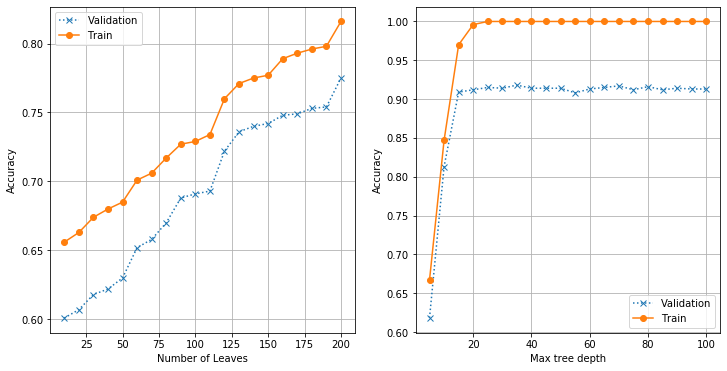

In [10]:
dt = build_decision_tree(X_train, Y_train, X_valid, Y_valid)

Max accuracy (validation, training): (0.97, 1.0)
Boostrap: True
N. estimators: 50
Max samples: 1.0
Tree criterion: gini
Execution took 5.73 min


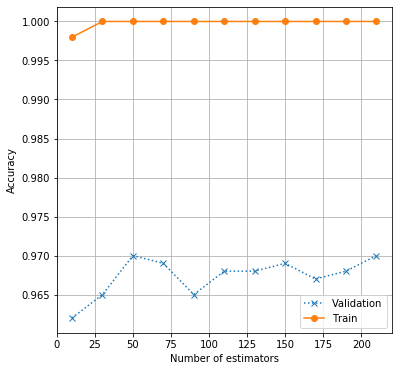

In [11]:
bagged_dt = build_bagging_classifier(X_train, Y_train, X_valid, Y_valid)

Max accuracy (validation, training): (0.991, 1.0)
N. estimators: 300
Learning rate: 0.25
Tree criterion: gini
Execution took 22.63 min


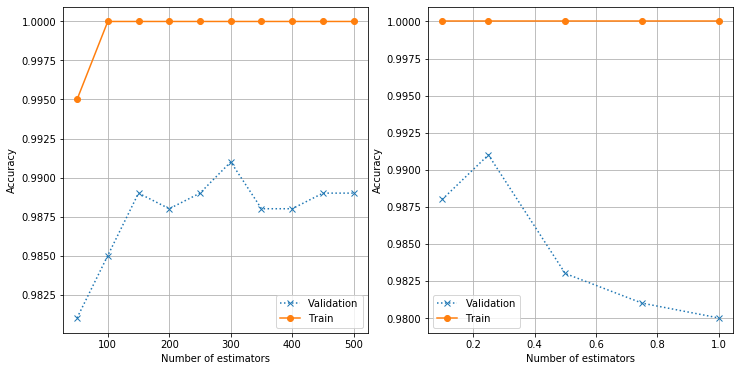

In [12]:
boosted_dt = build_adaboost(X_train, Y_train, X_valid, Y_valid)

Max accuracy (validation, training): (0.972, 1.0)
N. estimators: 400
Criterion: gini
Bootstrap: True
Features criterion (None means all features): None
Max tree depth: 20
Execution took 8.56 min


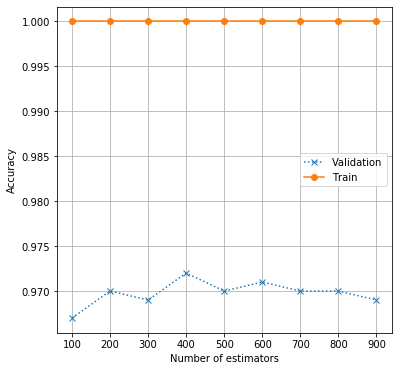

In [13]:
rf = build_random_forest(X_train, Y_train, X_valid, Y_valid)

#### Reports:
- Decision boundary of each model
- Features importance for model that supports it
- Finally, accuracy on test set

In [14]:
models = [('Decision tree', dt), 
          ('Bagging', bagged_dt),
          ('AdaBoost', boosted_dt),
          ('Random Forest', rf)]

Approximate decision boundaries for the different models


TypeError: list indices must be integers or slices, not tuple

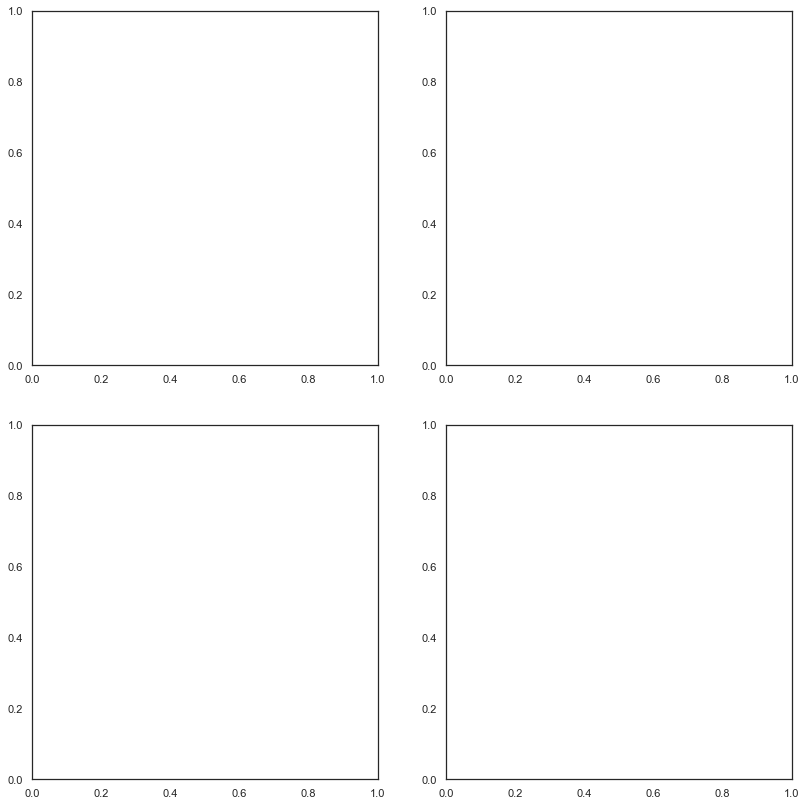

In [15]:
model_decision_boundary(models, X_test, Y_test)

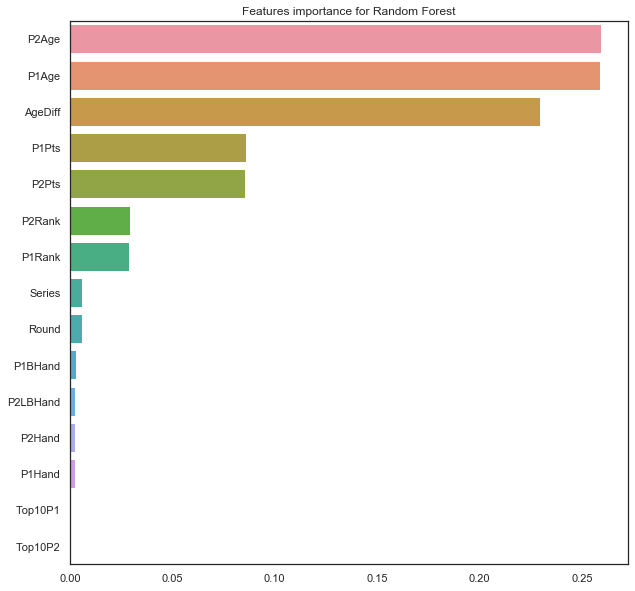

In [16]:
feature_importance(X_train, rf, 'Random Forest')

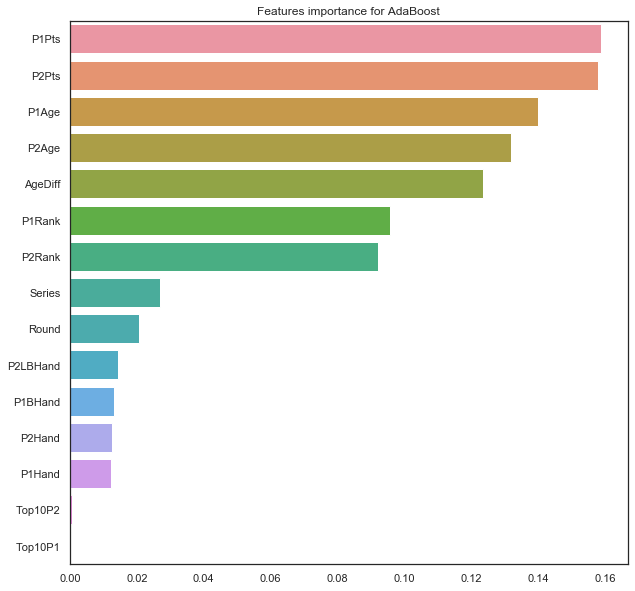

In [17]:
feature_importance(X_train, boosted_dt, 'AdaBoost')

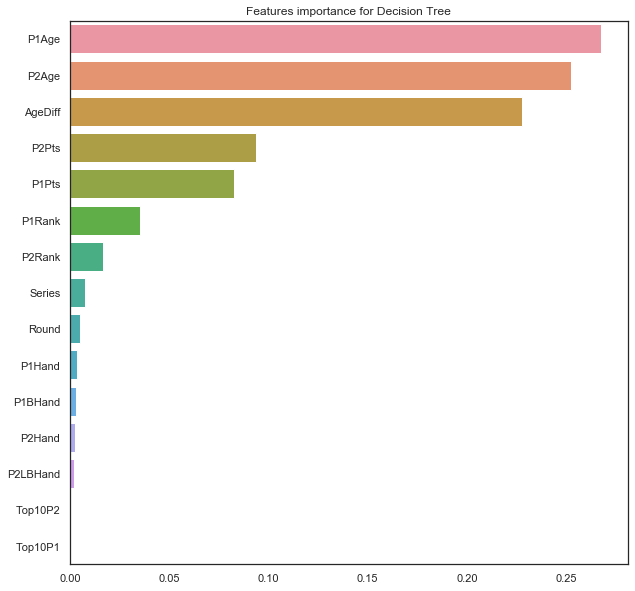

In [18]:
feature_importance(X_train, dt, 'Decision Tree')

In [19]:
report(X_test, Y_test, models)

Algorithm: Decision tree
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1726
           1       0.91      0.91      0.91      1726

    accuracy                           0.91      3452
   macro avg       0.91      0.91      0.91      3452
weighted avg       0.91      0.91      0.91      3452


Algorithm: Bagging
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1726
           1       0.96      0.96      0.96      1726

    accuracy                           0.96      3452
   macro avg       0.96      0.96      0.96      3452
weighted avg       0.96      0.96      0.96      3452


Algorithm: AdaBoost
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1726
           1       0.98      0.99      0.99      1726

    accuracy                           0.99      3452
   macro avg       0.99      0.99      0.99      3452
weighted